<a href="https://colab.research.google.com/github/abiraaaaaaf/DataVisualizationPythonWorkshop/blob/main/DataVisualizationWorkshop_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction to Data Visualization



**What is Data Visualization?**

With so much information being collected through data analysis in the business world today, we must have a way to **paint a picture of that data so we can interpret it**. Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets. 




**Why is Data Visualization Important?**

- For explanatory data analysis
- Communicate data clearly
- Share unbiased representation of data
- ...

**What Are The Benefits of Data Visualization?**

**Which Data Visualization Techniques are Used?**


**Who Uses Data Visualization?**

https://analytiks.co/importance-of-data-visualization/

### Different Types of Graphs:
- 
- 

Bargraph is simpler, cleaner, less distracting, and much easier to read

https://www.darkhorseanalytics.com/

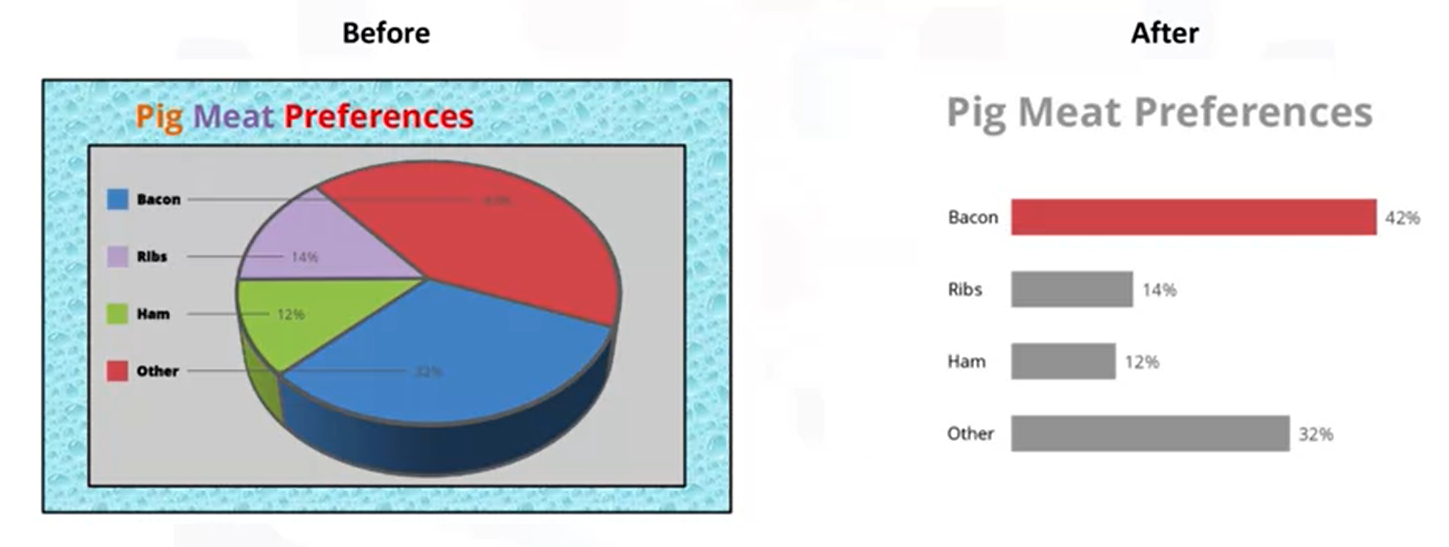

###Introduction to Matplotlib



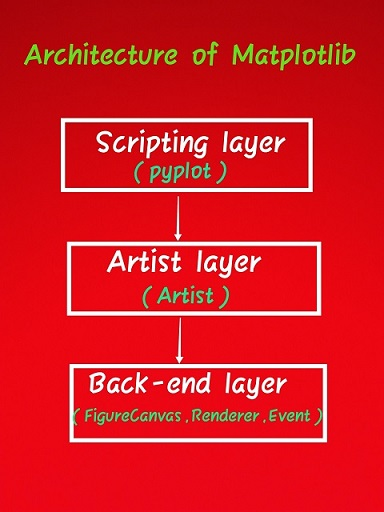

In [ ]:
import matplotlib as mpl
print('Matplotlib version: ', mpl.__version__)  

Matplotlib version:  3.2.2


In [ ]:
from matplotlib.backends.backend_agg import FigureCanvasAgg   # import FigureCanvasAgg 
from matplotlib.figure import Figure    # import Figure artist   (syntatically heavy)
import numpy as np

fig = Figure()
canvas = FigureCanvasAgg(fig)

x = np.random.randn(10000)  # generate 10000 random numbers
ax = fig.add_subplot(111)   # create an axes artist
ax.hist(x, 100)   # create a histogram of 10000 numbers
ax.set_title(r"Normal Distribution with $\mu=0, \sigma=1$")
fig.savefig("NormalDistribution1.png")

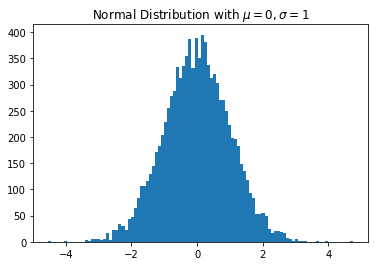

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.randn(10000)  # generate 10000 random numbers
plt.hist(x, 100) # 100 is the number of bins
plt.title(r"Normal Distribution with $\mu=0, \sigma=1$")
plt.savefig("NormalDistribution2.png")
plt.show()

Basic Plotting with Matplotlib

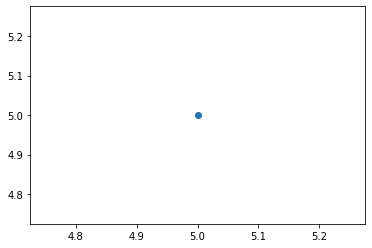

In [ ]:
import matplotlib.pyplot as plt
plt.plot(5,5,'o')
plt.show()

 If the plot gets generated in a new window then you can enforce generating plots within the browser using what's called a magic function

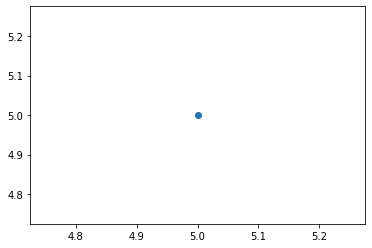

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(5,5,'o')
plt.show()

In [ ]:
# Check if an acive figure exists
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(5,5,'o')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'BigDataSociety')

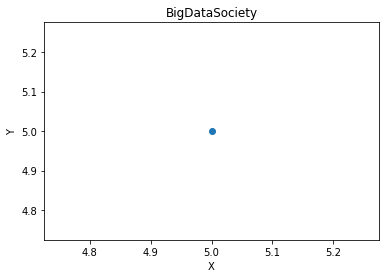

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(5,5,'o')
plt.ylabel("Y")
plt.xlabel("X")
plt.title("BigDataSociety")

In [ ]:
import pandas as pd
india_china_df = pd.DataFrame({'India':[8880, 8670, 8147, 7338, 5704], 
                    'China':[5123, 6682, 3308, 1863, 1527]},
                 index=[1980, 1981, 1982, 1983, 1984])

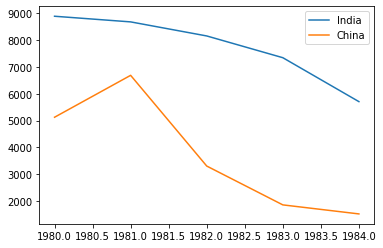

In [ ]:
india_china_df.plot(kind="line")

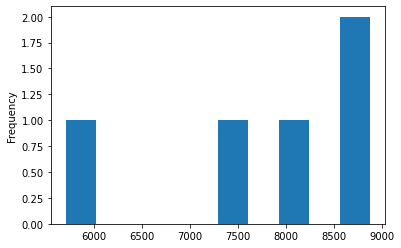

In [ ]:
india_china_df["India"].plot(kind="hist")

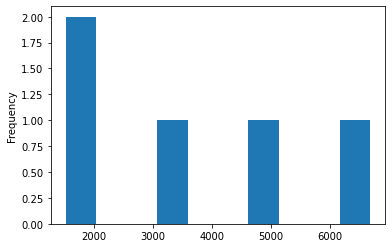

In [ ]:
india_china_df["China"].plot(kind="hist")

The Dataset: Immigration to Canada from 1980 to 2013

In [ ]:
import pandas as pd
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

 Each row also contains the total number of immigrants from that country for the years 1980 all the way to 2013.

In [ ]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Line Plots:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_canada.set_index('OdName', inplace = True)

In [ ]:
# Change years to be integers instead of strings
years = list(range(1980, 2014))

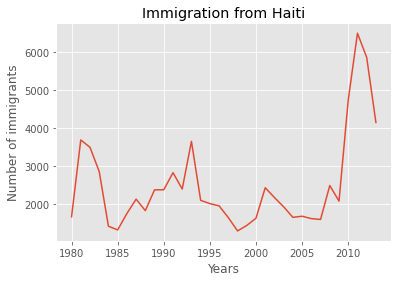

In [ ]:
# Simply sum across the years using our list of years instead of manually typing each year
df_canada['Total'] = df_canada[years].sum(axis=1)
df_canada.loc['Haiti', years].plot(kind='line')
plt.title("Immigration from Haiti")
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

In [ ]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_canada.columns

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [ ]:
df_canada.columns = list(map(str, df_canada.columns))

In [ ]:
years = list(map(str, range(1980, 2014)))

In [ ]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [ ]:
mpl.style.use(['ggplot']) # optional: for ggplot-like style

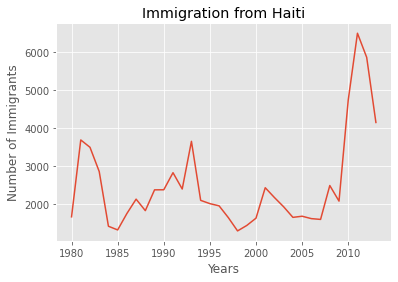

In [ ]:
df_canada.loc['Haiti', years].plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show() 

In [ ]:
df_CI = df_canada.loc[['China', 'India'], years] # passing in years 1980 - 2013 to exclude the 'total' column
df_CI = df_CI.transpose()

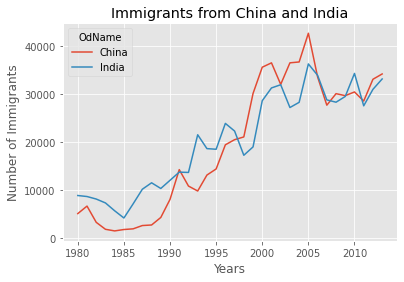

In [ ]:
df_CI.index = df_CI.index.map(int) 
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

In [ ]:
df_canada.sort_values(by='Total', axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_canada.tail(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose() 

print(df_top5)

OdName  Pakistan  Philippines  \
1980         978         6051   
1981         972         5921   
1982        1201         5249   
1983         900         4562   
1984         668         3801   
1985         514         3150   
1986         691         4166   
1987        1072         7360   
1988        1334         8639   
1989        2261        11865   
1990        2470        12509   
1991        3079        12718   
1992        4071        13670   
1993        4777        20479   
1994        4666        19532   
1995        4994        15864   
1996        9125        13692   
1997       13073        11549   
1998        9068         8735   
1999        9979         9734   
2000       15400        10763   
2001       16708        13836   
2002       15110        11707   
2003       13205        12758   
2004       13399        14004   
2005       14314        18139   
2006       13127        18400   
2007       10124        19837   
2008        8994        24887   
2009      

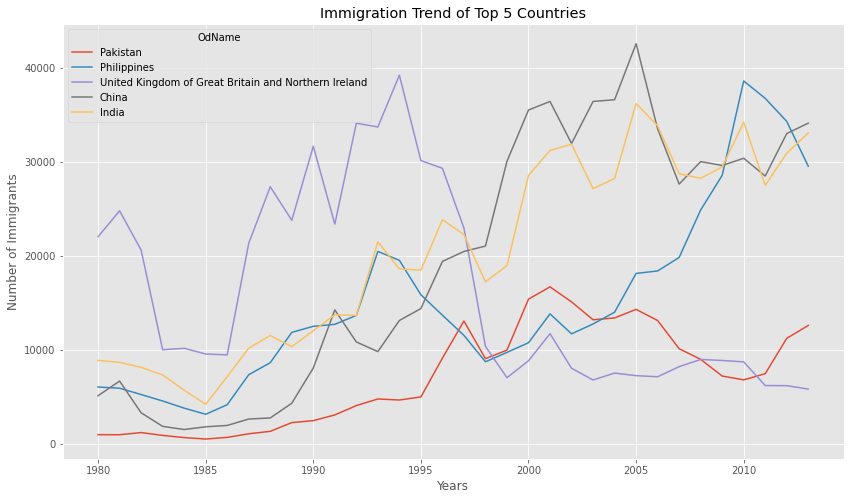

In [ ]:
df_top5.index = df_top5.index.map(int) 
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [ ]:
df_canada.sort_values(by='Total', axis=0, inplace=True)

# get the top 5 entries
df_bottom5 = df_canada.head(5)

# transpose the dataframe
df_bottom5 = df_bottom5[years].transpose() 

print(df_bottom5)

OdName  Palau  Marshall Islands  Western Sahara  San Marino  New Caledonia
1980        0                 0               0           1              0
1981        0                 0               0           0              0
1982        0                 0               0           0              0
1983        0                 0               0           0              0
1984        0                 0               0           0              0
1985        0                 0               0           0              0
1986        0                 0               0           1              0
1987        0                 0               0           0              0
1988        0                 0               0           0              0
1989        0                 0               0           0              0
1990        0                 0               0           1              0
1991        0                 0               1           0              0
1992        0            

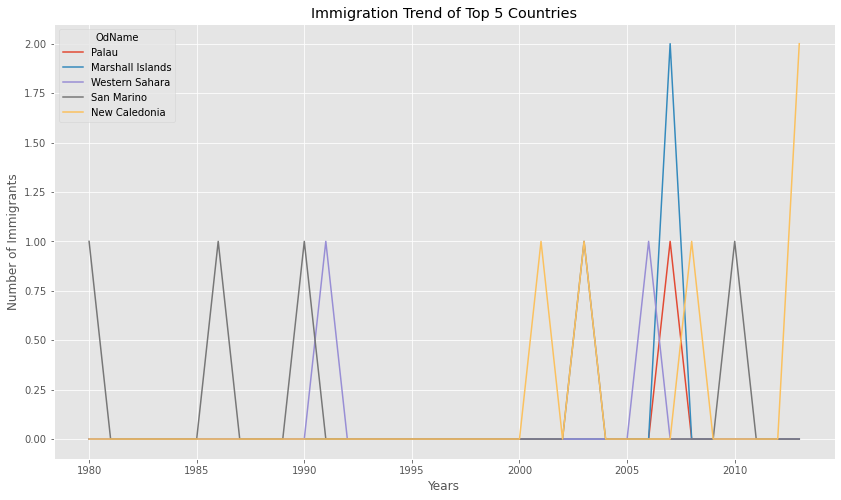

In [ ]:
df_bottom5.index = df_bottom5.index.map(int) 
df_bottom5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

##Area Plot
- also known as area chart or area graph
- commonly used to represent cumulated totals using numbers or percentages over time
- is based on the line plot


In [ ]:
import pandas as pd
df_canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_canada.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_canada.set_index('OdName', inplace = True)
df_canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

# Change years to be integers instead of strings
years = list(range(1980, 2014))
df_canada['Total'] = df_canada[years].sum(axis=1)

In [ ]:
df_canada.sort_values(by='Total', ascending = False, axis=0, inplace=True)

In [ ]:
df_canada.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
79,India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
36,China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
183,United Kingdom of Great Britain and Northern I...,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
136,Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
130,Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [ ]:
df_top5 = df_canada.head()
df_top5 = df_top5[years].transpose()
df_top5

,79,36,183,136,130
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


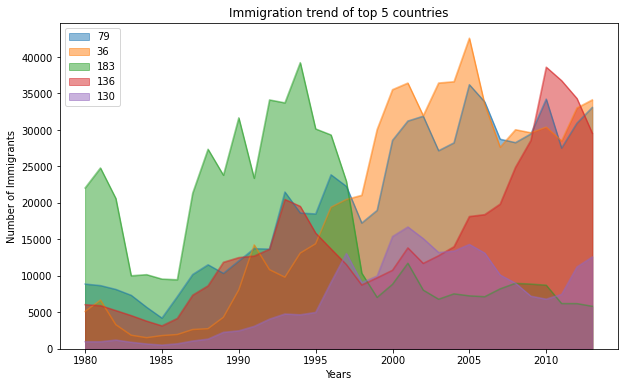

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_top5.plot(kind='area', figsize=(10, 6), stacked=False)

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

## Histograms
- a histogram is a way of representing the frequency distribution of a variable


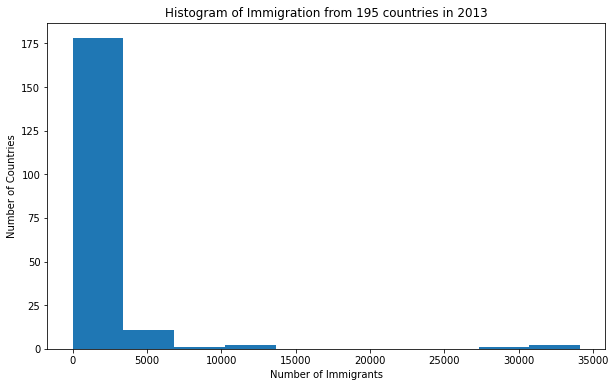

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_canada[2013].plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

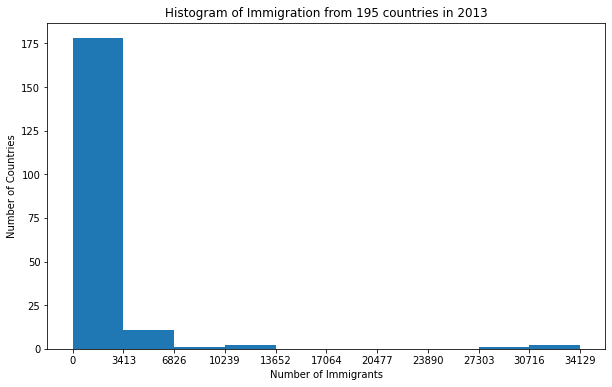

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

count, bin_edges = np.histogram(df_canada[2013])
df_canada[2013].plot(kind='hist', xticks=bin_edges, figsize=(10, 6))

plt.title('Histogram of Immigration from 195 countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Number of Immigrants')

plt.show()

## Bar Chart
- also known as bar graph
- unlike a histogram a bar chart is commonly used to compare the values of a variable at a given point in time

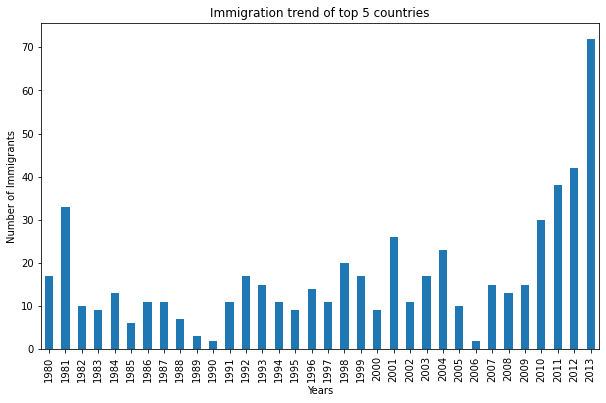

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_iceland = df_canada.loc['Iceland', years]
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

We will use pandas groupby method to summarize the immigration data by Continent. The general process of groupby involves the following steps:

- **Split:** Splitting the data into groups based on some criteria.
- **Apply:** Applying a function to each group independently: .sum() .count() .mean() .std() .aggregate() .apply() .etc..
- **Combine:** Combining the results into a data structure.

In [ ]:
years = list(range(1980, 2014))
df_canada['Total'] = df_canada[years].sum(axis=1)
df_continents = df_canada.groupby('Continent', axis = 0).sum()

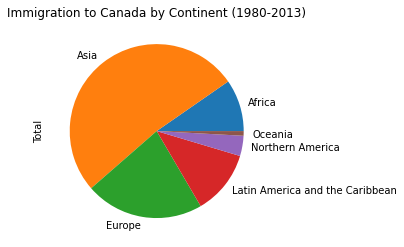

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_continents['Total'].plot(kind='pie')
plt.title("Immigration to Canada by Continent (1980-2013)")
plt.show()

### Box Plots
 
- **Minimum:** First and smallest number in sorted data
- **First Quartile:** 25% of the way through the sorted data
- **Median:** Median of the sorted data
- **Third Quartile:** 75% of the way through the sorted data
- **Maximum:** highest number in sorted data
- **Outliers:** Boxplots display outliers as individual dots that occur outside the upper and lower extremes


**IQR (Inter Quartile Range)**

Text(0, 0.5, 'Number of Immigrants')

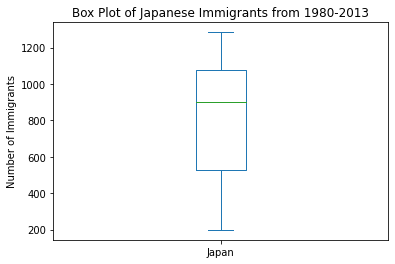

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_japan = df_canada.loc['Japan', years].transpose()
df_japan.plot(kind='box')
plt.title("Box Plot of Japanese Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")

### Scatter Plots

A scatter plot is a type of plot that displays values pertaining to typically two variables against each other. Usually it is **a dependent variable** to be plotted against **an independent variable** in order to determine if any correlation between the two variables exists

Text(0, 0.5, 'Number of Immigrants')

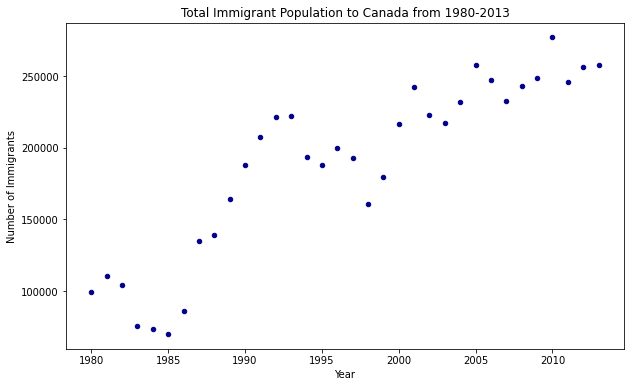

In [ ]:
df_total = pd.DataFrame(df_canada[years].sum(axis=0))
df_total.index = map(int, df_total.index)
df_total.reset_index(inplace = True)
df_total.columns = ['year', 'total']

df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title("Total Immigrant Population to Canada from 1980-2013")
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

In [ ]:
import numpy as np

x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

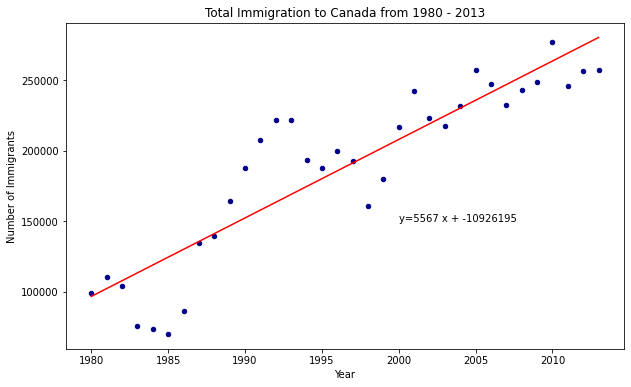

'No. Immigrants = 5567 * Year + -10926195'

In [ ]:
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

###Heatmap:

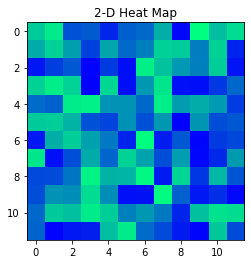

In [2]:
# Program to plot 2-D Heat map
# using matplotlib.pyplot.imshow() method
import numpy as np
import matplotlib.pyplot as plt
  
data = np.random.random(( 12 , 12 ))
plt.imshow( data , cmap = 'winter' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()

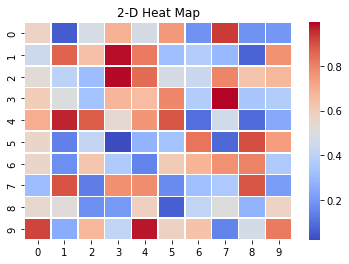

In [3]:
# Program to plot 2-D Heat map
# using seaborn.heatmap() method
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
  
data_set = np.random.rand( 10 , 10 )
ax = sns.heatmap( data_set , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()

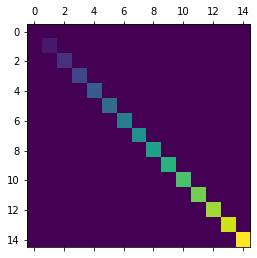

In [4]:
a = np.diag(range(15))
plt.matshow(a)

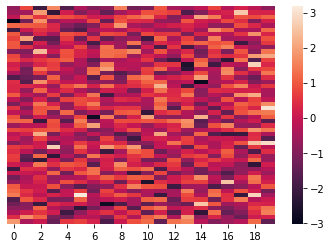

In [7]:
import seaborn as sns
import numpy as np

data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)